In [1]:
#### Notebook to predict the average next action that is predicted by dynamics 
#### plotted against the average next action that actually happens; 

In [2]:
import analysis_config
from online_analysis import util_fcns, plot_actions
from matplotlib import cm
import copy
import matplotlib as mpl

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


in task
in task
in task


In [48]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
animal = 'grom'
model_set_number = 7; 
#dat_cond = pickle.load(open(analysis_config.config[animal+'_pref'] + 'tuning_models_'+animal+'_model_set%d_cond_spec.pkl' %(model_set_number), 'rb'))
dat = pickle.load(open(analysis_config.config[animal+'_pref'] + 'tuning_models_'+animal+'_model_set%d_task_spec_pls_gen.pkl' %(model_set_number), 'rb'))

In [43]:
##### For day, get decoder trials ####
day = 3; 
minobs = 10; 

F, K = util_fcns.get_grom_decoder(day)
dyn_model = 'hist_1pos_0psh_0spksm_1_spksp_0'
model_type = 2; # General model 

spks = dat[day, 'spks']
pred_spks = dat[day, dyn_model][:, :, model_type]
pred_push = np.dot(K[[3, 5], :], pred_spks.T).T

bin_num = dat[day, 'bin_num']
tsk = dat[day, 'task']
pos = dat[day, 'pos']
vel = dat[day, 'vel']
trl = dat[day, 'trl']
push = dat[day, 'np']

In [44]:
### Segment up the pushes into discrete bins ###
mag_boundaries = pickle.load(open(analysis_config.config['grom_pref'] + 'radial_boundaries_fit_based_on_perc_feb_2019.pkl'))
command_bins = util_fcns.commands2bins([push], mag_boundaries, animal, day, vel_ix = [0,1], ndiv=8)[0]

In [45]:
mag_boundaries

{('grom', 0): [0.8684366201688718, 1.3691201381147022, 1.972000184185049],
 ('grom', 1): [1.0431174919208128, 1.752324071050608, 2.5704391180731787],
 ('grom', 2): [1.7898042563114989, 2.815968132987056, 4.021426445742906],
 ('grom', 3): [0.5948213048805475, 0.9059400074937669, 1.2895338560962468],
 ('grom', 4): [0.5977405317621156, 0.9461448833381223, 1.3814479443336825],
 ('grom', 5): [0.9573354946054617, 1.4800746631173607, 2.1334716653191927],
 ('grom', 6): [0.8584706907077286, 1.3384290733967994, 1.9002821011208155],
 ('grom', 7): [0.44792821290508067, 0.6853493076901207, 0.9733191344072071],
 ('grom', 8): [1.1345180286396734, 1.782880553890338, 2.666703985230291],
 ('jeev', 0): [2.6152978716501547, 3.898361423714384, 5.517601420872091],
 ('jeev', 1): [2.5274151332823767, 3.7540413838697217, 5.322591688294147],
 ('jeev', 2): [2.4151647135611363, 3.6862931151131133, 5.238806696716357],
 ('jeev', 3): [1.0659826182763883, 1.9555093009199838, 3.207481947496786]}

In [46]:
#### Saving ###
save = False
save_dir = '/Users/preeyakhanna/Dropbox/Carmena_Lab/Documentation/BMI_co_obs_paper/data/action_distributions_w_preds'

### Go through adjacent targets 
for tg0 in range(8):
    tg1 = np.mod(tg0+1, 8)

    plot_actions.plot_pred(command_bins, push, bin_num, tsk, trl, mag_boundaries[animal, day], 
          targ0 = tg0, targ1 = tg1, min_obs = 20, min_obs2 = 3, arrow_scale=.01, 
          lims = 8, prefix='day0_minobs_20_3', save = save, save_dir = save_dir,
          pred_push = pred_push)

<IPython.core.display.Javascript object>


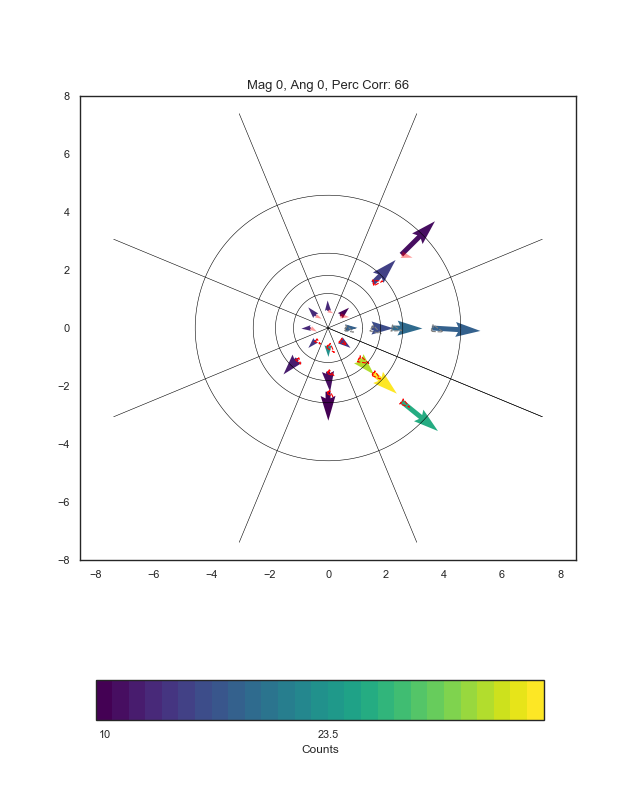

Followup, m 0, a 0
Followup, m 0, a 1
Followup, m 0, a 2
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 0
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 0
Followup, m 2, a 1
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 0
Followup, m 3, a 1
Followup, m 3, a 7
All mx = 36, mn = 10


<IPython.core.display.Javascript object>


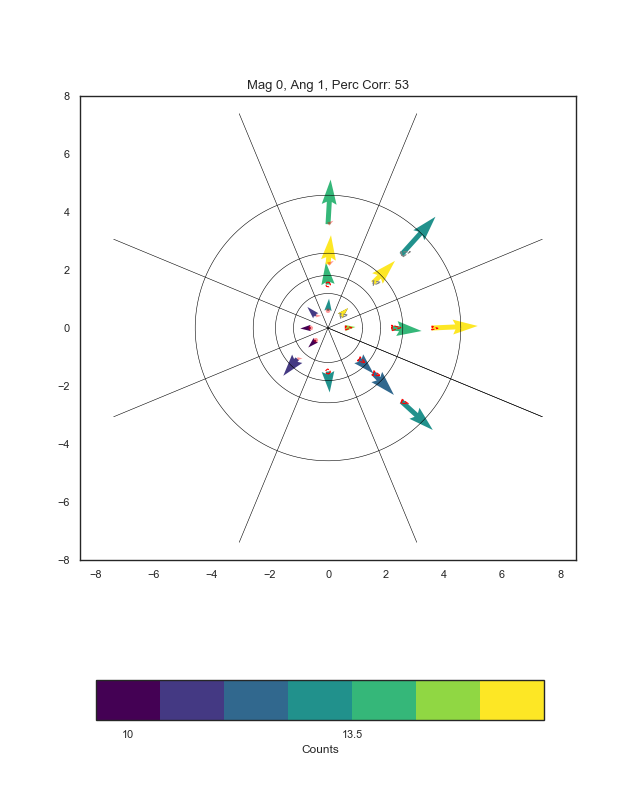

Followup, m 0, a 0
Followup, m 0, a 1
Followup, m 0, a 2
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 1, a 2
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 0
Followup, m 2, a 1
Followup, m 2, a 2
Followup, m 2, a 7
Followup, m 3, a 0
Followup, m 3, a 1
Followup, m 3, a 2
Followup, m 3, a 7
All mx = 16, mn = 10


<IPython.core.display.Javascript object>


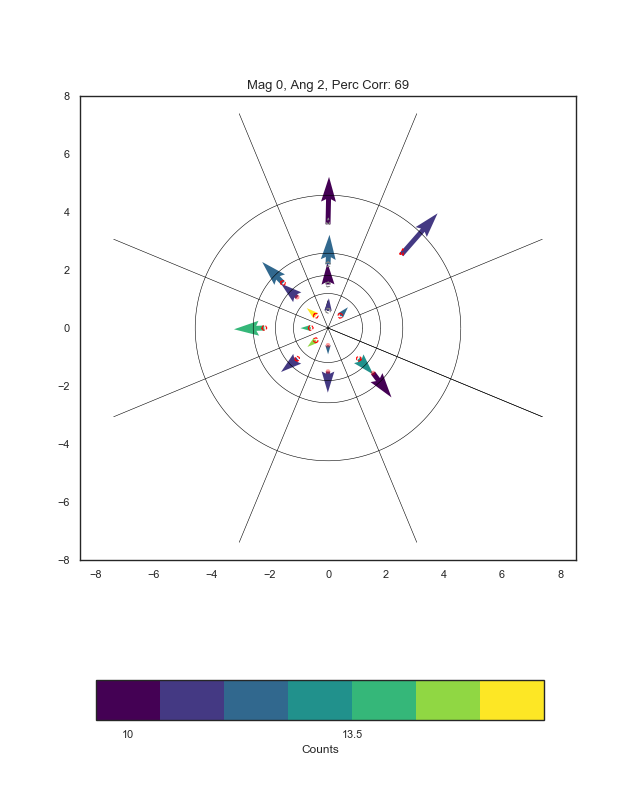

Followup, m 0, a 1
Followup, m 0, a 2
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 1, a 2
Followup, m 1, a 3
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 2
Followup, m 2, a 3
Followup, m 2, a 4
Followup, m 2, a 7
Followup, m 3, a 1
Followup, m 3, a 2
All mx = 16, mn = 10


<IPython.core.display.Javascript object>


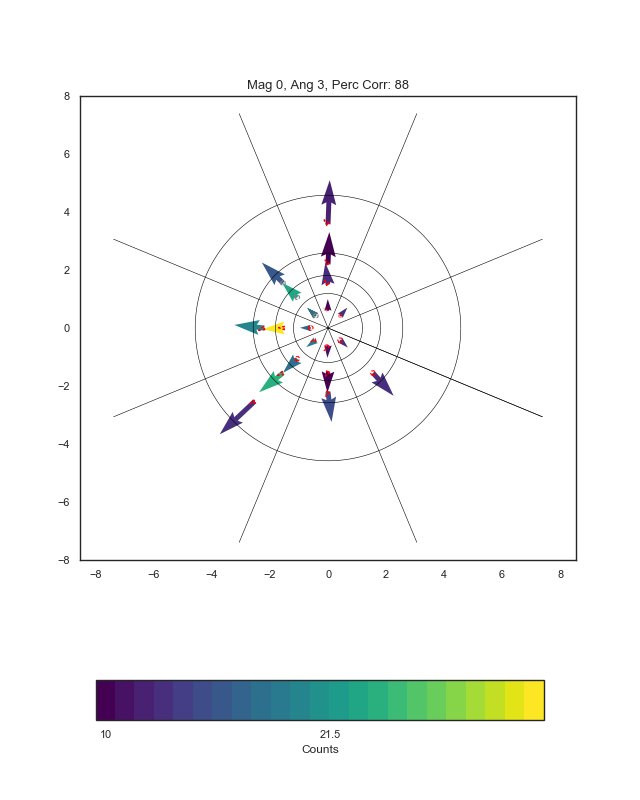

Followup, m 0, a 1
Followup, m 0, a 2
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 2
Followup, m 1, a 3
Followup, m 1, a 4
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 2, a 2
Followup, m 2, a 3
Followup, m 2, a 4
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 2
Followup, m 3, a 5
All mx = 32, mn = 10


<IPython.core.display.Javascript object>


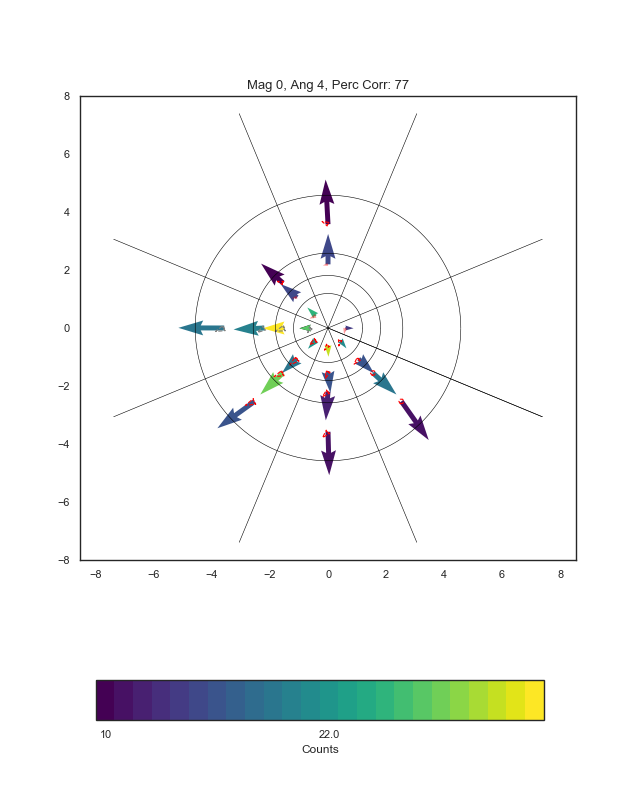

Followup, m 0, a 0
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 3
Followup, m 1, a 4
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 2
Followup, m 2, a 3
Followup, m 2, a 4
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 2
Followup, m 3, a 4
Followup, m 3, a 5
Followup, m 3, a 6
Followup, m 3, a 7
All mx = 33, mn = 10


<IPython.core.display.Javascript object>


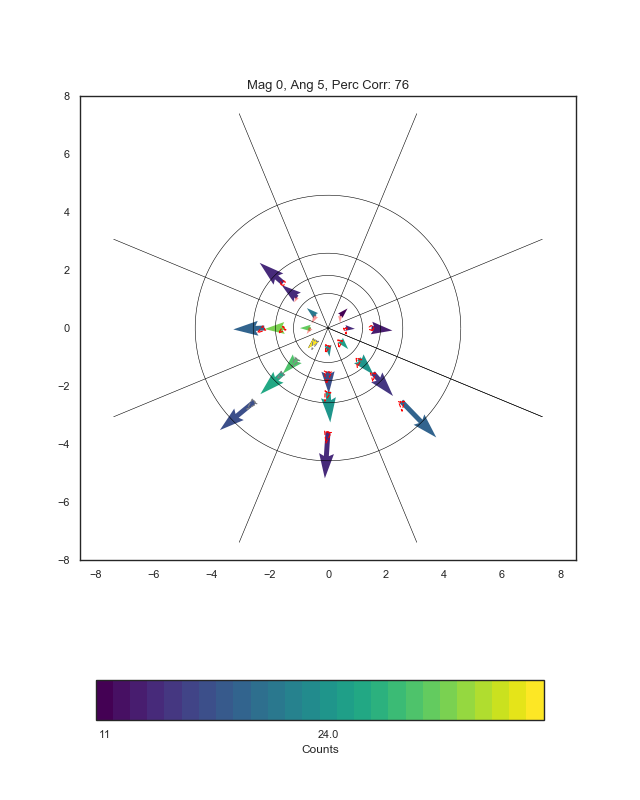

Followup, m 0, a 0
Followup, m 0, a 1
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 0
Followup, m 1, a 3
Followup, m 1, a 4
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 3
Followup, m 2, a 4
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 5
Followup, m 3, a 6
Followup, m 3, a 7
All mx = 36, mn = 11


<IPython.core.display.Javascript object>


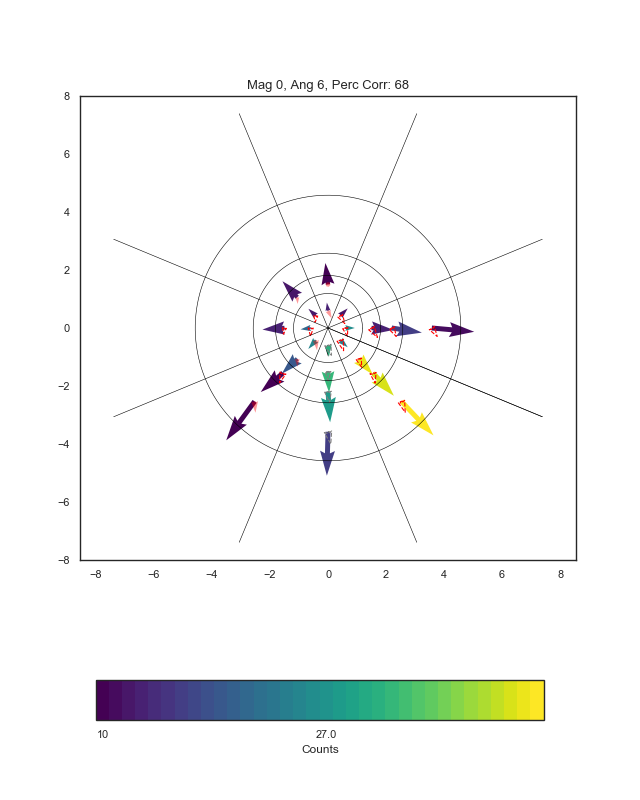

Followup, m 0, a 0
Followup, m 0, a 1
Followup, m 0, a 2
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 0
Followup, m 1, a 2
Followup, m 1, a 3
Followup, m 1, a 4
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 0
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 0
Followup, m 3, a 5
Followup, m 3, a 6
Followup, m 3, a 7
All mx = 43, mn = 10


<IPython.core.display.Javascript object>


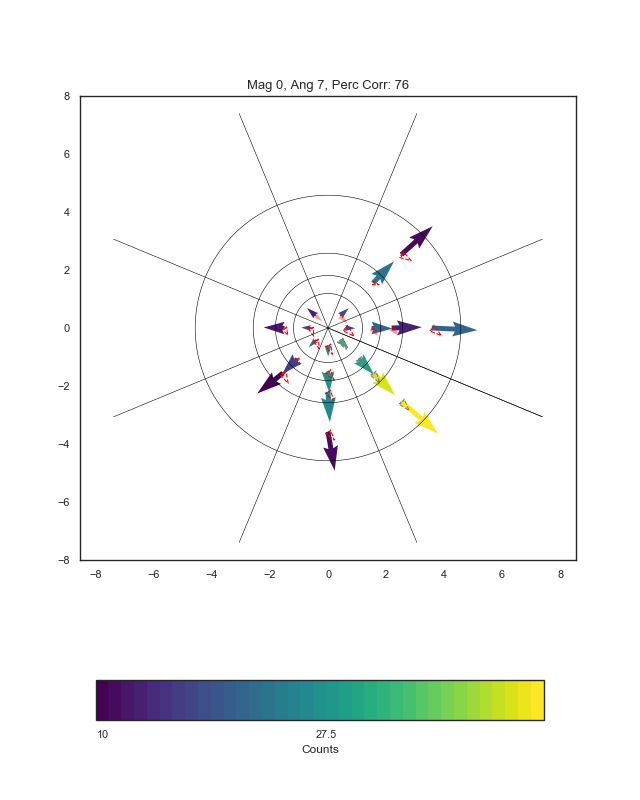

Followup, m 0, a 0
Followup, m 0, a 1
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 0
Followup, m 1, a 4
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 0
Followup, m 2, a 1
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 0
Followup, m 3, a 1
Followup, m 3, a 6
Followup, m 3, a 7
All mx = 44, mn = 10


<IPython.core.display.Javascript object>


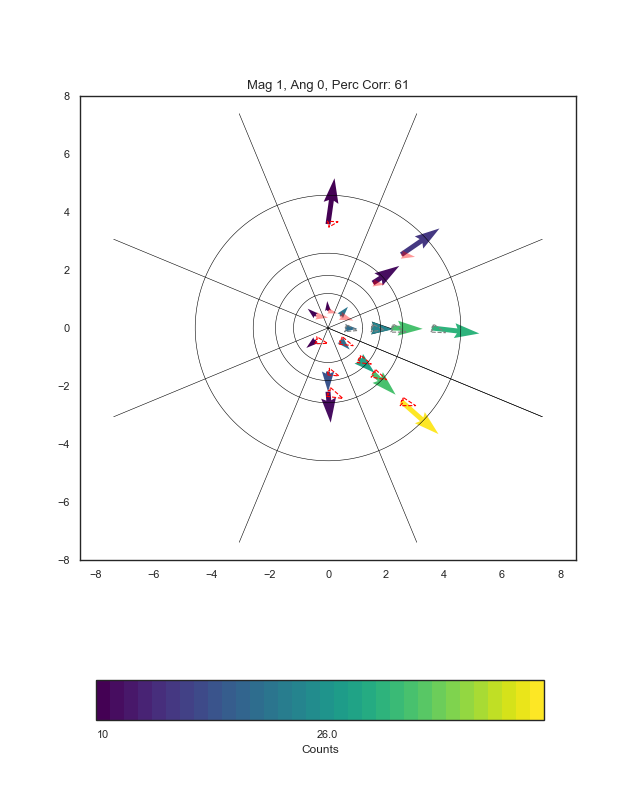

Followup, m 0, a 0
Followup, m 0, a 1
Followup, m 0, a 2
Followup, m 0, a 3
Followup, m 0, a 5
Followup, m 0, a 7
Followup, m 1, a 0
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 0
Followup, m 2, a 1
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 0
Followup, m 3, a 1
Followup, m 3, a 2
Followup, m 3, a 7
All mx = 41, mn = 10


<IPython.core.display.Javascript object>


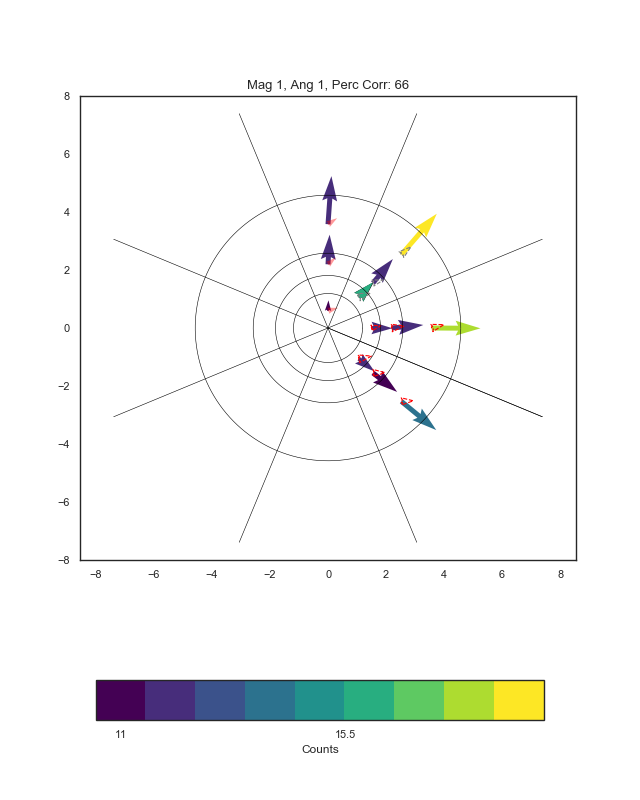

Followup, m 0, a 2
Followup, m 1, a 0
Followup, m 1, a 1
Followup, m 1, a 7
Followup, m 2, a 0
Followup, m 2, a 1
Followup, m 2, a 2
Followup, m 2, a 7
Followup, m 3, a 0
Followup, m 3, a 1
Followup, m 3, a 2
Followup, m 3, a 7
All mx = 19, mn = 11


<IPython.core.display.Javascript object>


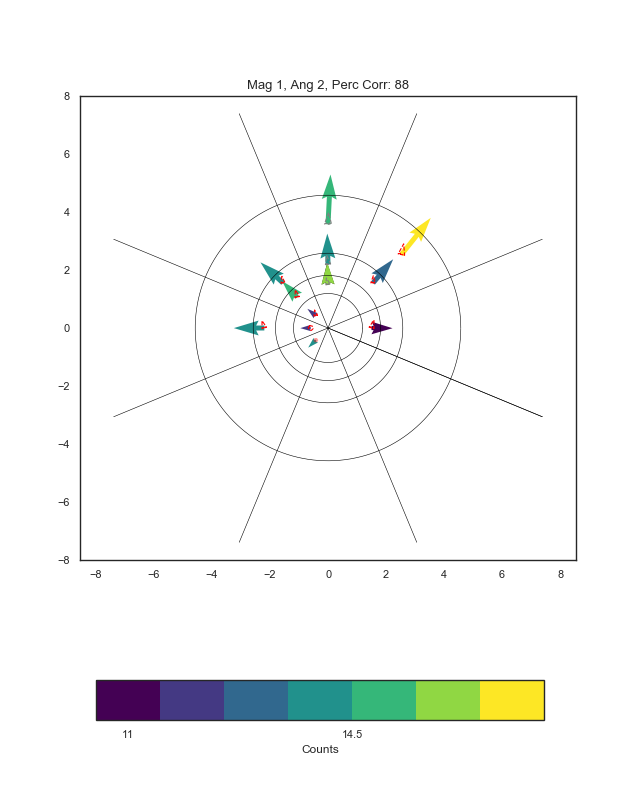

Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 1, a 0
Followup, m 1, a 2
Followup, m 1, a 3
Followup, m 2, a 1
Followup, m 2, a 2
Followup, m 2, a 3
Followup, m 2, a 4
Followup, m 3, a 1
Followup, m 3, a 2
All mx = 17, mn = 11


<IPython.core.display.Javascript object>


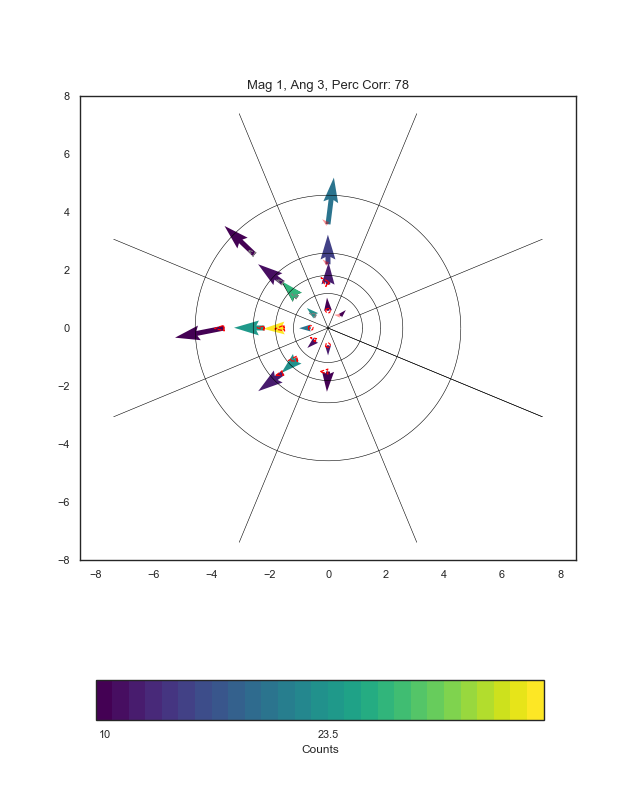

Followup, m 0, a 1
Followup, m 0, a 2
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 1, a 2
Followup, m 1, a 3
Followup, m 1, a 4
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 2, a 2
Followup, m 2, a 3
Followup, m 2, a 4
Followup, m 2, a 5
Followup, m 3, a 2
Followup, m 3, a 3
Followup, m 3, a 4
All mx = 36, mn = 10


<IPython.core.display.Javascript object>


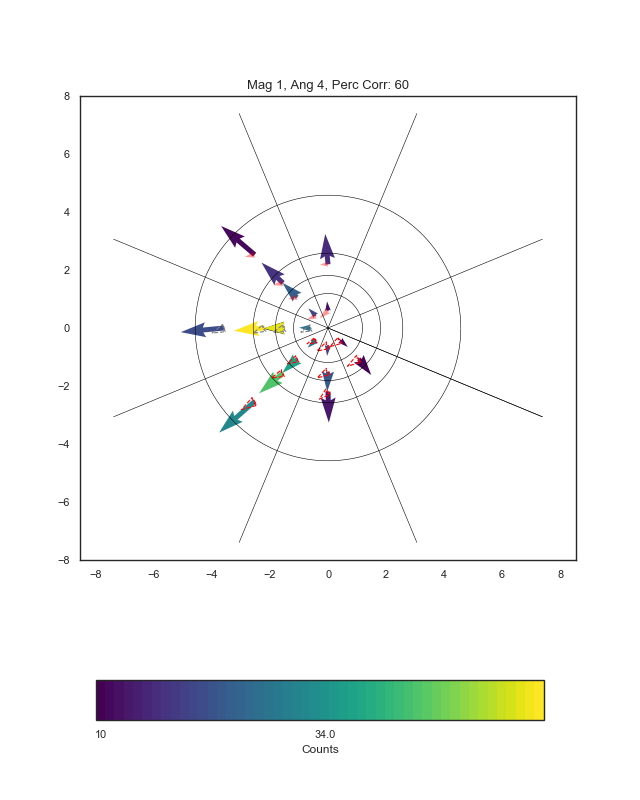

Followup, m 0, a 2
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 3
Followup, m 1, a 4
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 2
Followup, m 2, a 3
Followup, m 2, a 4
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 3, a 3
Followup, m 3, a 4
Followup, m 3, a 5
All mx = 57, mn = 10


<IPython.core.display.Javascript object>


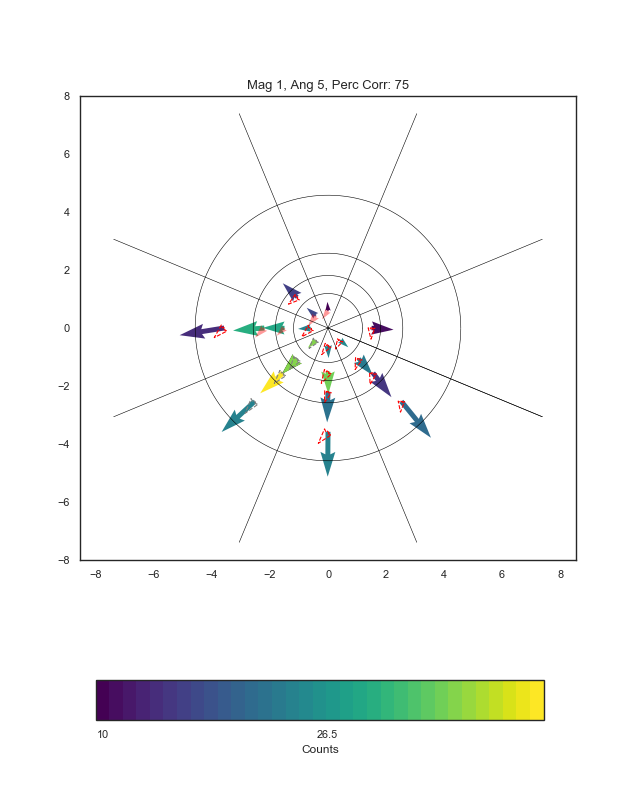

Followup, m 0, a 2
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 0
Followup, m 1, a 3
Followup, m 1, a 4
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 4
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 4
Followup, m 3, a 5
Followup, m 3, a 6
Followup, m 3, a 7
All mx = 42, mn = 10


<IPython.core.display.Javascript object>


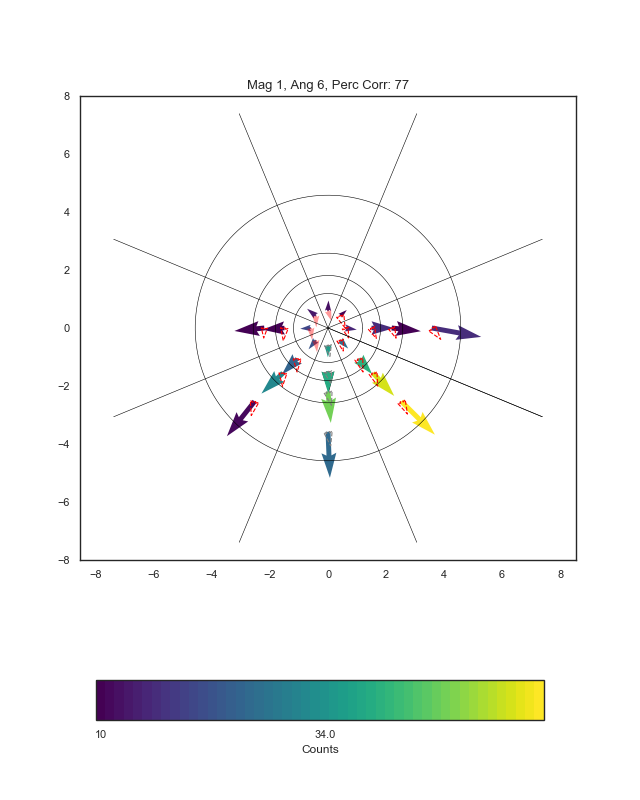

Followup, m 0, a 0
Followup, m 0, a 1
Followup, m 0, a 2
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 0
Followup, m 1, a 4
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 0
Followup, m 2, a 4
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 0
Followup, m 3, a 5
Followup, m 3, a 6
Followup, m 3, a 7
All mx = 57, mn = 10


<IPython.core.display.Javascript object>


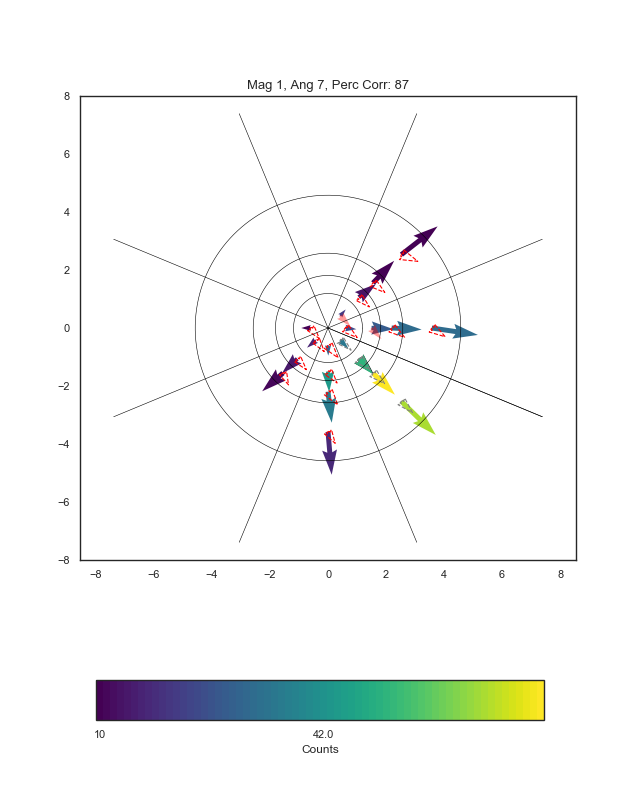

Followup, m 0, a 0
Followup, m 0, a 1
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 0
Followup, m 1, a 1
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 0
Followup, m 2, a 1
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 0
Followup, m 3, a 1
Followup, m 3, a 6
Followup, m 3, a 7
All mx = 73, mn = 10


<IPython.core.display.Javascript object>


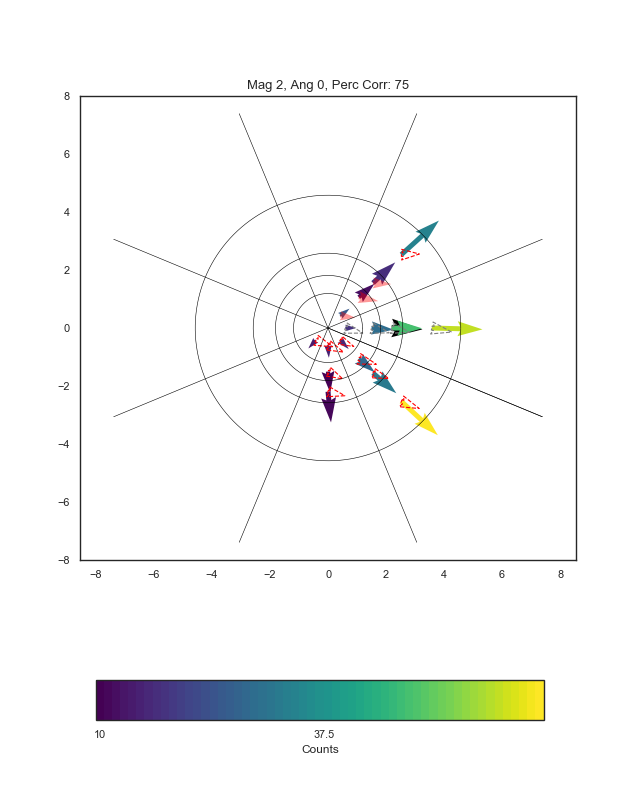

Followup, m 0, a 0
Followup, m 0, a 1
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 0
Followup, m 1, a 1
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 0
Followup, m 2, a 1
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 0
Followup, m 3, a 1
Followup, m 3, a 7
All mx = 64, mn = 10


<IPython.core.display.Javascript object>


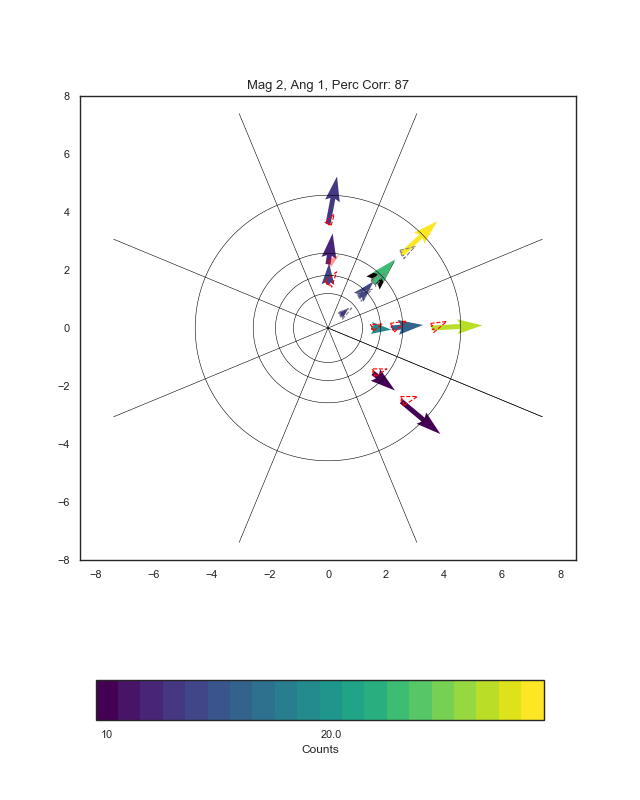

Followup, m 0, a 1
Followup, m 1, a 0
Followup, m 1, a 1
Followup, m 1, a 2
Followup, m 2, a 0
Followup, m 2, a 1
Followup, m 2, a 2
Followup, m 2, a 7
Followup, m 3, a 0
Followup, m 3, a 1
Followup, m 3, a 2
Followup, m 3, a 7
All mx = 29, mn = 10


<IPython.core.display.Javascript object>


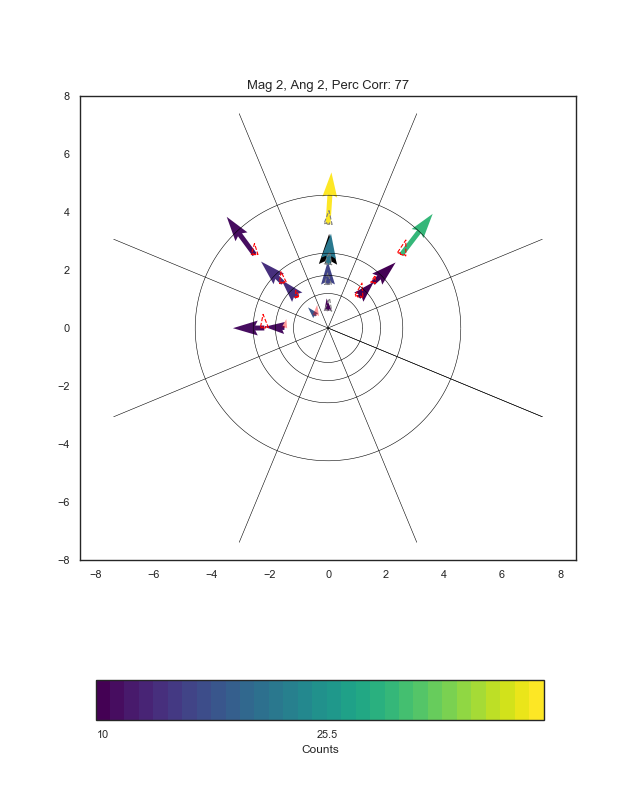

Followup, m 0, a 2
Followup, m 0, a 3
Followup, m 1, a 1
Followup, m 1, a 2
Followup, m 1, a 3
Followup, m 1, a 4
Followup, m 2, a 1
Followup, m 2, a 2
Followup, m 2, a 3
Followup, m 2, a 4
Followup, m 3, a 1
Followup, m 3, a 2
Followup, m 3, a 3
All mx = 40, mn = 10


<IPython.core.display.Javascript object>


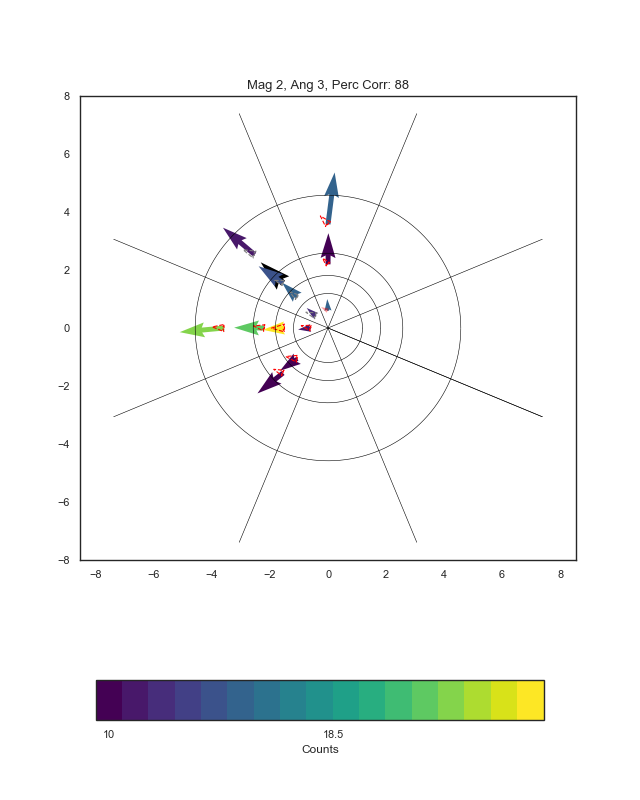

Followup, m 0, a 2
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 1, a 3
Followup, m 1, a 4
Followup, m 1, a 5
Followup, m 2, a 2
Followup, m 2, a 3
Followup, m 2, a 4
Followup, m 2, a 5
Followup, m 3, a 2
Followup, m 3, a 3
Followup, m 3, a 4
All mx = 26, mn = 10


<IPython.core.display.Javascript object>


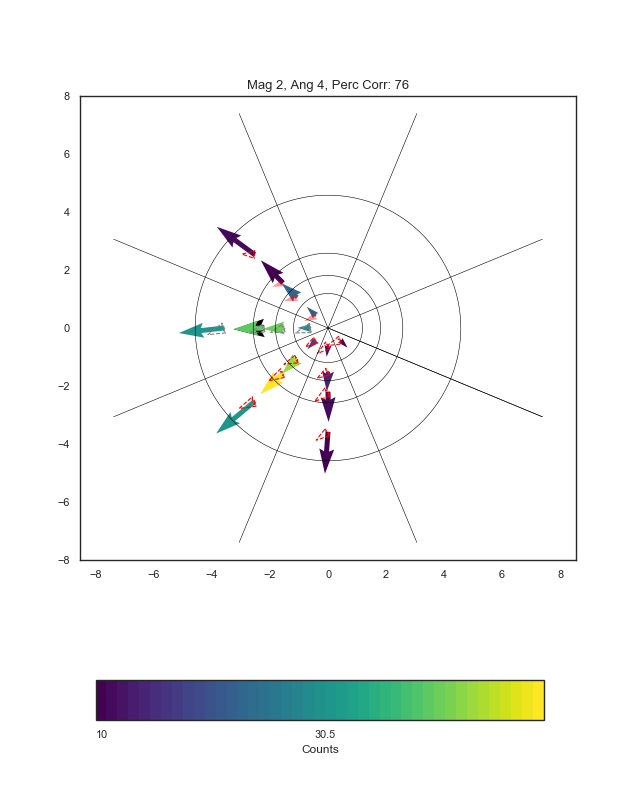

Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 3
Followup, m 1, a 4
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 2, a 3
Followup, m 2, a 4
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 3, a 3
Followup, m 3, a 4
Followup, m 3, a 5
Followup, m 3, a 6
All mx = 50, mn = 10


<IPython.core.display.Javascript object>


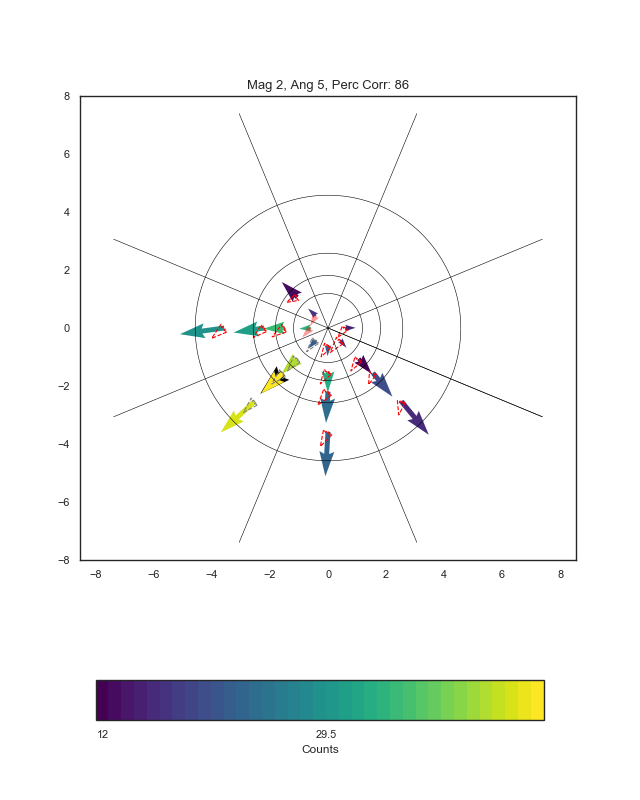

Followup, m 0, a 0
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 3
Followup, m 1, a 4
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 4
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 4
Followup, m 3, a 5
Followup, m 3, a 6
Followup, m 3, a 7
All mx = 46, mn = 12


<IPython.core.display.Javascript object>


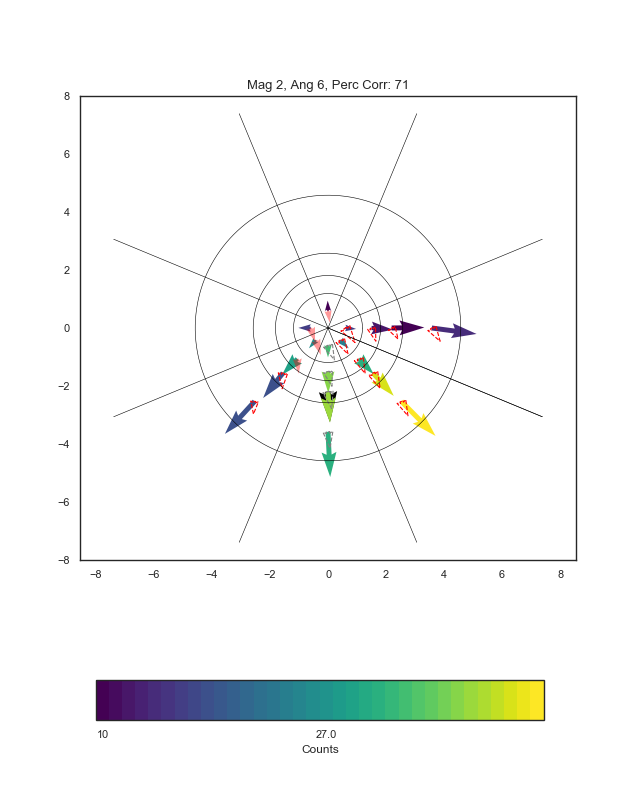

Followup, m 0, a 0
Followup, m 0, a 2
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 0
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 0
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 0
Followup, m 3, a 5
Followup, m 3, a 6
Followup, m 3, a 7
All mx = 43, mn = 10


<IPython.core.display.Javascript object>


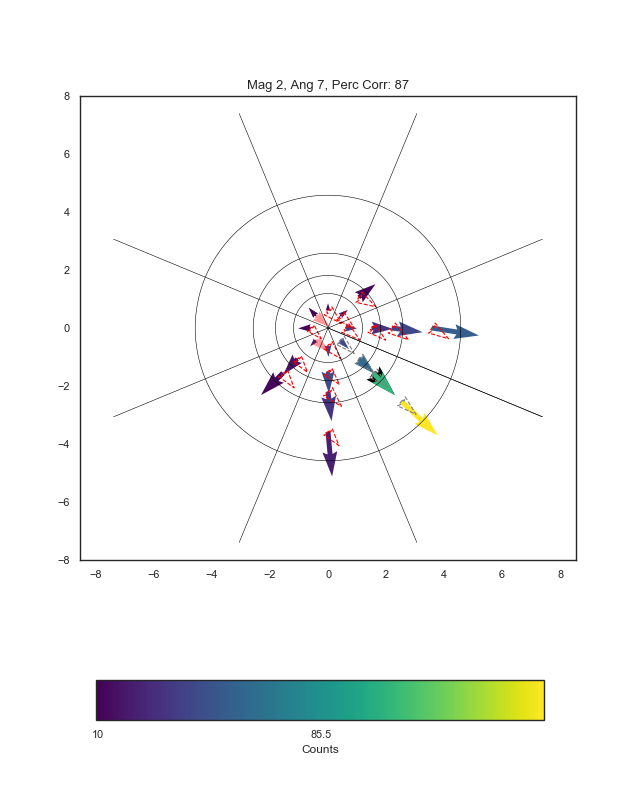

Followup, m 0, a 0
Followup, m 0, a 1
Followup, m 0, a 2
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 0
Followup, m 1, a 1
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 0
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 0
Followup, m 3, a 6
Followup, m 3, a 7
All mx = 160, mn = 10


<IPython.core.display.Javascript object>


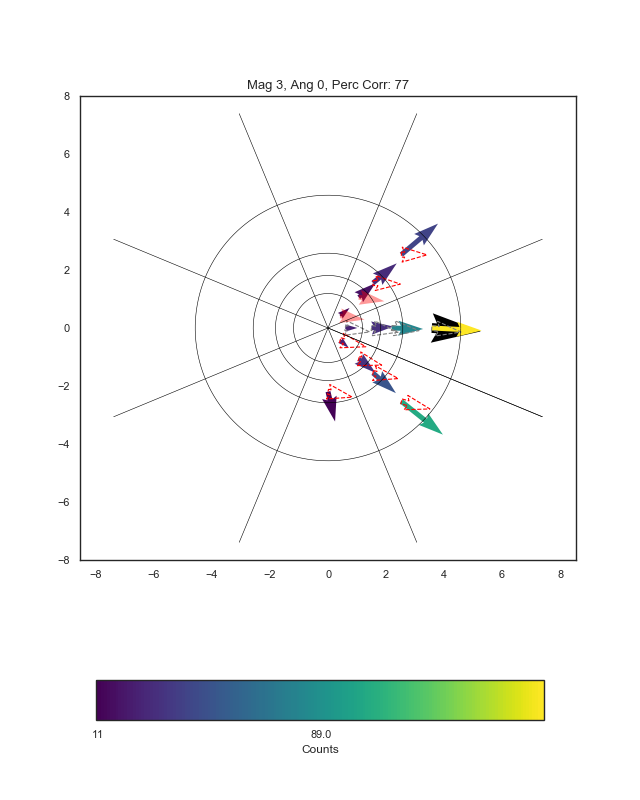

Followup, m 0, a 0
Followup, m 0, a 1
Followup, m 0, a 7
Followup, m 1, a 0
Followup, m 1, a 1
Followup, m 1, a 7
Followup, m 2, a 0
Followup, m 2, a 1
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 0
Followup, m 3, a 1
Followup, m 3, a 7
All mx = 166, mn = 11


<IPython.core.display.Javascript object>


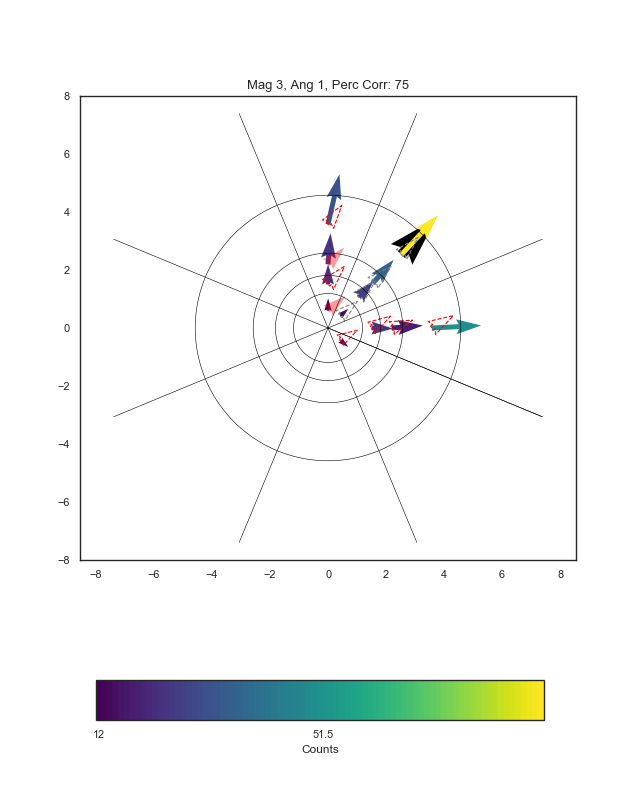

Followup, m 0, a 1
Followup, m 0, a 2
Followup, m 0, a 7
Followup, m 1, a 0
Followup, m 1, a 1
Followup, m 1, a 2
Followup, m 2, a 0
Followup, m 2, a 1
Followup, m 2, a 2
Followup, m 3, a 0
Followup, m 3, a 1
Followup, m 3, a 2
All mx = 90, mn = 12


<IPython.core.display.Javascript object>


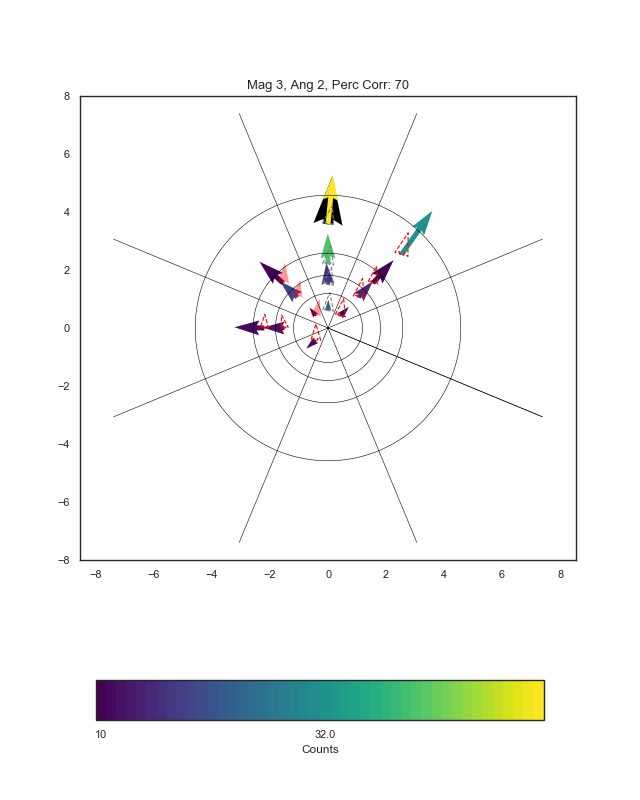

Followup, m 0, a 1
Followup, m 0, a 2
Followup, m 0, a 3
Followup, m 0, a 5
Followup, m 1, a 1
Followup, m 1, a 2
Followup, m 1, a 3
Followup, m 1, a 4
Followup, m 2, a 1
Followup, m 2, a 2
Followup, m 2, a 3
Followup, m 2, a 4
Followup, m 3, a 1
Followup, m 3, a 2
All mx = 53, mn = 10


<IPython.core.display.Javascript object>


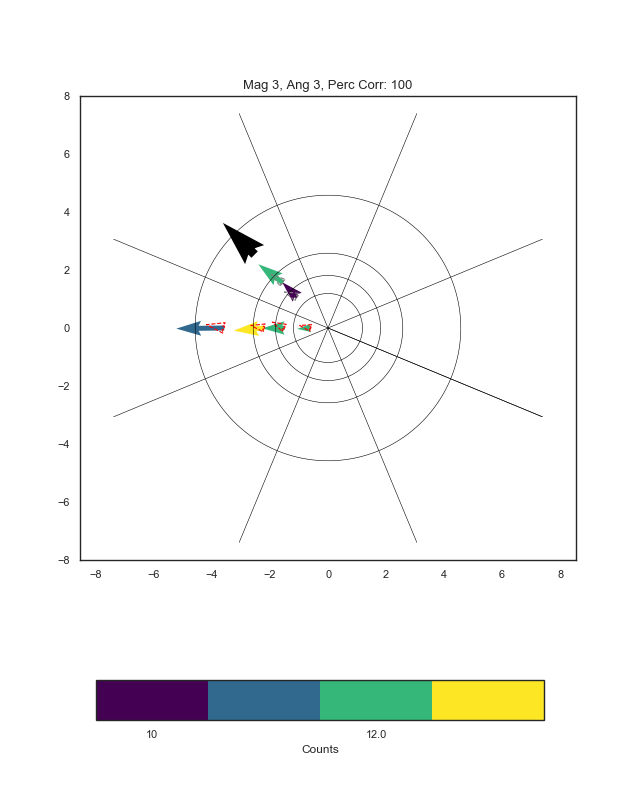

Followup, m 0, a 4
Followup, m 1, a 3
Followup, m 1, a 4
Followup, m 2, a 3
Followup, m 2, a 4
Followup, m 3, a 4
All mx = 13, mn = 10


<IPython.core.display.Javascript object>


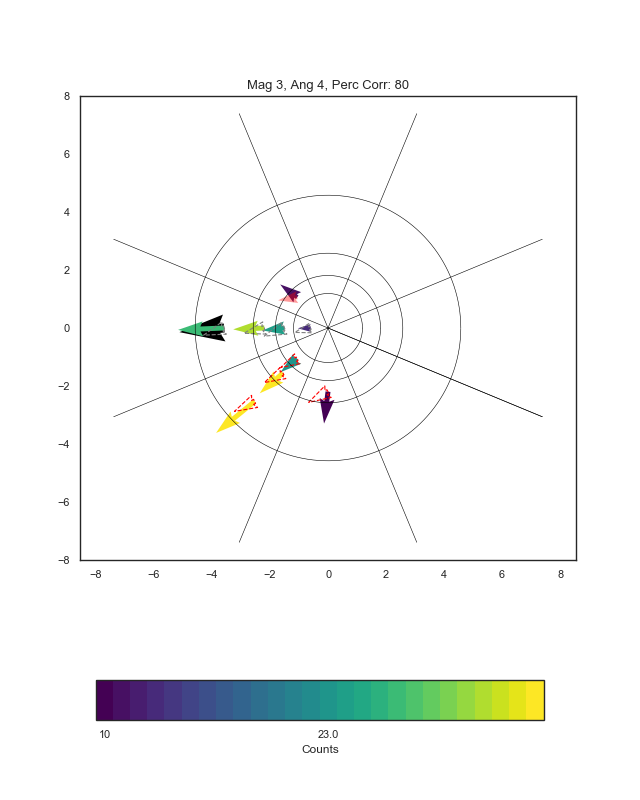

Followup, m 0, a 4
Followup, m 1, a 3
Followup, m 1, a 4
Followup, m 1, a 5
Followup, m 2, a 4
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 3, a 4
Followup, m 3, a 5
All mx = 35, mn = 10


<IPython.core.display.Javascript object>


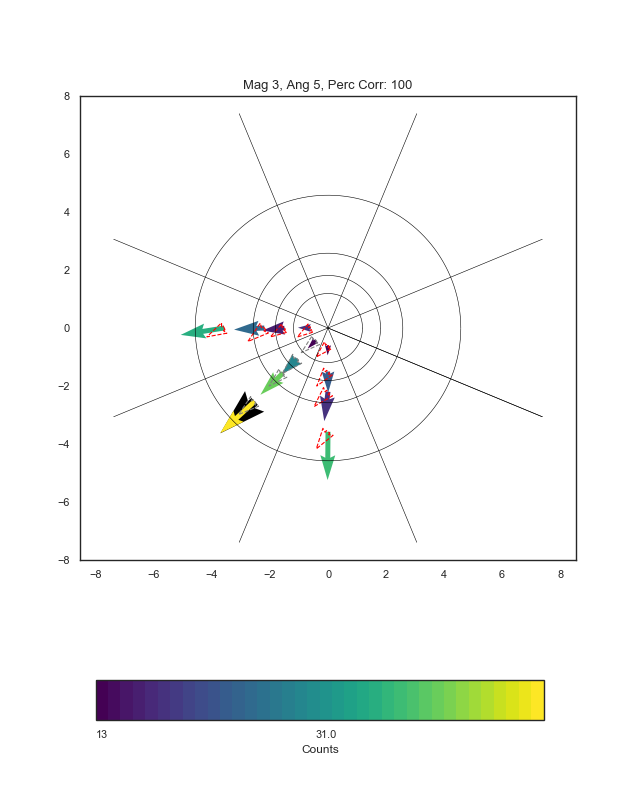

Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 1, a 4
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 2, a 4
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 3, a 4
Followup, m 3, a 5
Followup, m 3, a 6
All mx = 48, mn = 13


<IPython.core.display.Javascript object>


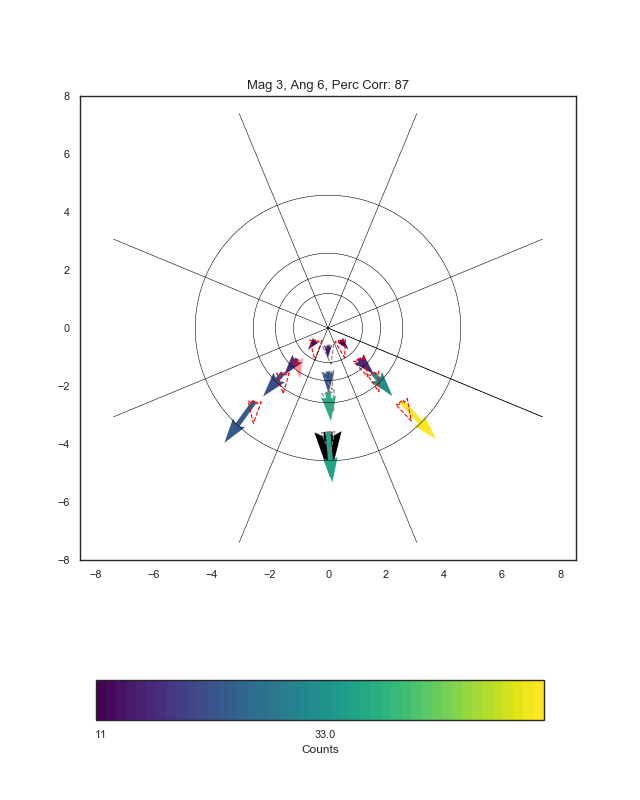

Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 5
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 5
Followup, m 3, a 6
Followup, m 3, a 7
All mx = 54, mn = 11


<IPython.core.display.Javascript object>


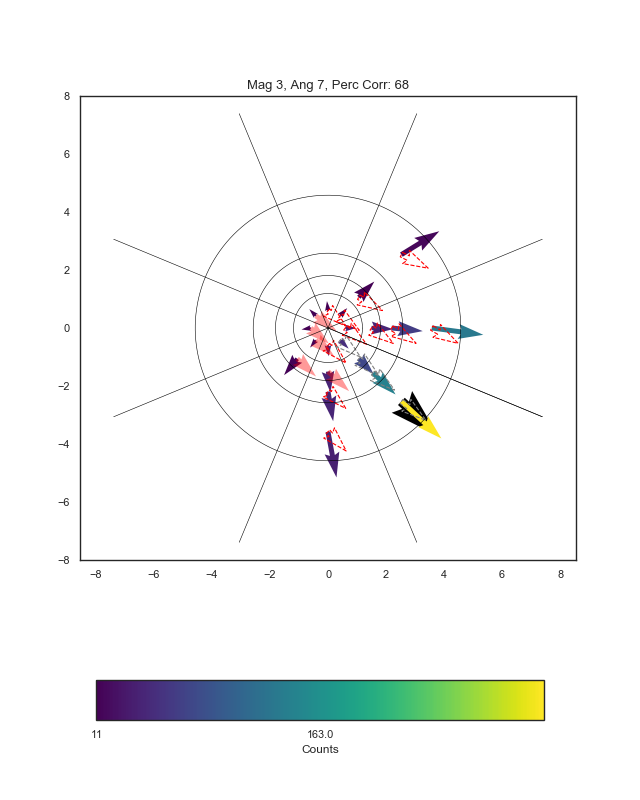

Followup, m 0, a 0
Followup, m 0, a 1
Followup, m 0, a 2
Followup, m 0, a 3
Followup, m 0, a 4
Followup, m 0, a 5
Followup, m 0, a 6
Followup, m 0, a 7
Followup, m 1, a 0
Followup, m 1, a 1
Followup, m 1, a 5
Followup, m 1, a 6
Followup, m 1, a 7
Followup, m 2, a 0
Followup, m 2, a 6
Followup, m 2, a 7
Followup, m 3, a 0
Followup, m 3, a 1
Followup, m 3, a 6
Followup, m 3, a 7
All mx = 314, mn = 11


In [47]:
### Make action plots for each magnitude / angle; 
save_dir = '/Users/preeyakhanna/Dropbox/Carmena_Lab/Documentation/BMI_co_obs_paper/data/action_distributions_all_cond_w_preds'
plot_actions.plot_pred_across_full_day(command_bins, push, bin_num, mag_boundaries[animal, day], 
                                       min_obs2 = minobs, arrow_scale = .01, lims = 8, 
                                       prefix = 'day%d_minobs_%d'%(day, minobs), save = True, save_dir = save_dir, 
                                       pred_push = pred_push, 
                                       scale_rad = 2.)